In [8]:
import pathlib
import timeit
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm


# ---------------- DEFINE FUNCTIONS ----------------

def predict_random_forest(x_te, x_tr, y_tr, kList):
    every_prediction = []
    for k in tqdm(kList):
        rndf = RandomForestClassifier(n_estimators=k, criterion="entropy")
        rndf.fit(x_tr, y_tr)
        prediction = rndf.predict(x_te)
        every_prediction.append(prediction)
    return every_prediction


# Check the accuracy of given predictions on the test set y_test
def check_accuracy(y_test, predictions):
    ground_truth = y_test.to_list()
    size = len(ground_truth)
    lst = []

    for predict in predictions:
        count = 0
        for i, j in enumerate(ground_truth):
            if predict[i] == ground_truth[i]:
                count += 1
        lst.append(count / size)
    return lst


# ---------------- PREPARE DATA ----------------

# PLOT TIME VS DATASET SIZE

selectionSizeRange = list(range(1, 11, 1))
runtime = [] 
for size in selectionSizeRange:
    df=pd.read_csv(dirPath)
    print()
    df = df.sample(int(math.floor(df.shape[0]*size/10)), random_state=35)
    # print(df.head())

    # Set class-label from true/false to 0/1
    df['class'] = df['class'].astype(int)

    # Split into input and target variables
    X = df.iloc[:, 2:]  # Remove the ID and Class columns
    Y = df.iloc[:, 1]

    # Scale data
    x = X.values # returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    #scaler = preprocessing.StandardScaler()
    #x_scaled = scaler.fit_transform(x)
    x_scaled = min_max_scaler.fit_transform(x)
    df_x_scaled = pd.DataFrame(x_scaled)
    # print(df_x_scaled)

    # Import test-data and scaling the data
    pathTest = '../Datasets/breast-cancer-diagnostic.shuf.tes.csv'
    dirPathTest = pathlib.Path(pathTest)
    df_test=pd.read_csv(dirPathTest)

    xTest = df_test.iloc[:, 1:]  # Remove the ID and Class columns
    x_test = xTest.values # returns a numpy array

    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x_test)

    #scaler = preprocessing.StandardScaler()
    #x_scaled = scaler.fit_transform(x_test)

    df_test_normalized = pd.DataFrame(x_scaled)
    # print(df_test_normalized)


    KList = [1, 5, 10, 50, 100, 1000]

    X_train, X_test, Y_train, Y_test = train_test_split(df_x_scaled, Y, test_size=0.1 , random_state=35)

    # RANDOM FORESTS
    start = timeit.default_timer()
    all_predictions = predict_random_forest(X_test, X_train, Y_train, KList)
    stop = timeit.default_timer()
    time = stop - start
    print('Time: ', time)
    runtime.append(time)

fig = plt.figure()
newList = [x / 10 for x in selectionSizeRange]
plt.scatter(newList, runtime)
fig.suptitle('Time vs Dataset size (params: K=[1, 5, 10, 50, 100, 1000])', fontsize=14)
plt.xlabel('Dataset Size', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.savefig('Breastcancer_plot_timeVSdatasetsize.png')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  6.49it/s]


Time:  0.926971500000036



100%|██████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  6.24it/s]


Time:  0.9637770000001638



100%|██████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  6.10it/s]


Time:  0.986082099999976



100%|██████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.81it/s]


Time:  1.0356543999998848



100%|██████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.48it/s]


Time:  1.0970260000001417



100%|██████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.41it/s]


Time:  1.1124560000000656



100%|██████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.14it/s]


Time:  1.1698725999999624



100%|██████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.91it/s]


Time:  1.2254376000000775



100%|██████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.55it/s]


Time:  1.321002500000077



100%|██████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.49it/s]

Time:  1.3367062999998325


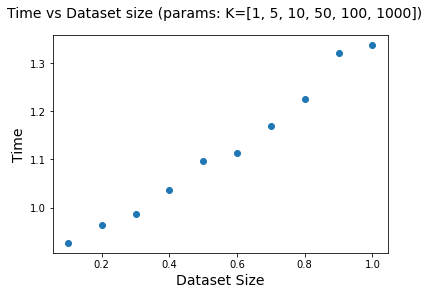

In [32]:
# PLOT TIME VS DATASET SIZE

selectionSizeRange = list(range(1, 11, 1))
runtime = [] 
for size in selectionSizeRange:
    df=pd.read_csv(dirPath)
    print()
    df = df.sample(int(math.floor(df.shape[0]*size/10)), random_state=35)
    # print(df.head())

    # Set class-label from true/false to 0/1
    df['class'] = df['class'].astype(int)

    # Split into input and target variables
    X = df.iloc[:, 2:]  # Remove the ID and Class columns
    Y = df.iloc[:, 1]

    # Scale data
    x = X.values # returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    #scaler = preprocessing.StandardScaler()
    #x_scaled = scaler.fit_transform(x)
    x_scaled = min_max_scaler.fit_transform(x)
    df_x_scaled = pd.DataFrame(x_scaled)
    # print(df_x_scaled)

    # Import test-data and scaling the data
    pathTest = '../Datasets/breast-cancer-diagnostic.shuf.tes.csv'
    dirPathTest = pathlib.Path(pathTest)
    df_test=pd.read_csv(dirPathTest)

    xTest = df_test.iloc[:, 1:]  # Remove the ID and Class columns
    x_test = xTest.values # returns a numpy array

    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x_test)

    #scaler = preprocessing.StandardScaler()
    #x_scaled = scaler.fit_transform(x_test)

    df_test_normalized = pd.DataFrame(x_scaled)
    # print(df_test_normalized)


    KList = [1, 5, 10, 50, 100, 1000]

    X_train, X_test, Y_train, Y_test = train_test_split(df_x_scaled, Y, test_size=0.1 , random_state=35)

    # RANDOM FORESTS
    start = timeit.default_timer()
    all_predictions = predict_random_forest(X_test, X_train, Y_train, KList)
    stop = timeit.default_timer()
    time = stop - start
    print('Time: ', time)
    runtime.append(time)

fig = plt.figure()
newList = [x / 10 for x in selectionSizeRange]
plt.scatter(newList, runtime)
fig.suptitle('Time vs Dataset size (params: K=[1, 5, 10, 50, 100, 1000])', fontsize=14)
plt.xlabel('Dataset Size', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.savefig('Breastcancer_RF_plot_timeVSdatasetsize.png')
plt.show()

In [ ]:
# ---------------- APPLY MODEL & TEST EFFICIENCY ----------------

r = []
t = []
runtime = []
testSizeRange = list(range(10, 35, 5))
KList = [1, 5, 10, 50, 100, 1000]

print("\nTRAINING USING RANDOM FOREST")
for testSize in testSizeRange:
    X_train, X_test, Y_train, Y_test = train_test_split(df_x_scaled, Y, test_size=testSize / 100, random_state=35)

    # RANDOM FORESTS
    start = timeit.default_timer()
    all_predictions = predict_random_forest(X_test, X_train, Y_train, KList)
    stop = timeit.default_timer()
    time = stop - start
    print('Time: ', time)
    results = check_accuracy(Y_test, all_predictions)
    print("\nTest size = ", testSize / 100)
    print(results)
    testSize = testSize / 100
    r.append(results)
    t.append(testSize)
    runtime.append(time)

In [4]:
print(runtime)

[1.2305273999999997, 1.2058998, 1.1646343999999997, 1.1657875999999998, 1.1235160000000004]
